In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('./pre-exisiting-conditions-by-state-congressional-district-QueryResult.csv')

In [3]:
data.columns

Index(['State', 'Representative (District)',
       'Age 0 to 17 with Pre-existing Condition',
       'Age 18 to 24 with Pre-existing Condition',
       'Age 25 to 34 with Pre-existing Condition',
       'Age 35 to 44 with Pre-existing Condition',
       'Age 45 to 54 with Pre-existing Condition',
       'Age 55 to 64 with Pre-existing Condition',
       'Nonelderly with Pre-existing Condition',
       'Percent of Nonelderly with Pre-existing Condition'],
      dtype='object')

In [4]:
data.groupby('State')['Age 18 to 24 with Pre-existing Condition'].sum()

State
Alabama                                                22,300 
Arizona        27,000   35,300   19,000   22,900   20,400  ...
Arkansas                                               22,300 
Florida        17,900   19,500   26,700   24,000   19,400  ...
Georgia        28,600   27,800   26,900   25,600   34,300  ...
Hawaii                                        24,100   25,400 
Idaho                                         27,500   30,200 
Illinois       27,100   25,100   24,700   27,100   22,000  ...
Indiana        24,300   25,900   25,100   35,300   22,100  ...
Iowa                        28,900   30,600   25,700   32,800 
Kansas                      32,500   31,600   23,100   24,400 
Kentucky       25,800   27,600   23,900   22,700   22,400  ...
Louisiana      25,900   28,900   27,100   27,000   26,000  ...
Maine                                         21,200   20,000 
Maryland       25,200   26,600   24,900   23,400   30,600  ...
National                                         

# Which state(s) will be affected by the repeal of the Affordable Health Act

## *Grouped by age group*

In [5]:
population = data[['Age 0 to 17 with Pre-existing Condition',
       'Age 18 to 24 with Pre-existing Condition',
       'Age 25 to 34 with Pre-existing Condition',
       'Age 35 to 44 with Pre-existing Condition',
       'Age 45 to 54 with Pre-existing Condition',
       'Age 55 to 64 with Pre-existing Condition',
       'Nonelderly with Pre-existing Condition']]
for col in population:
    population[col] = [ float(str(count).replace(',','')) for count in population[col]]

In [6]:
population['State'] = data['State']

In [7]:
populationByState = population.groupby('State').sum()

In [8]:
populationByState.reset_index(inplace=True)

In [9]:
populationByState.drop(populationByState.index[len(populationByState)-1],inplace=True)

In [10]:
populationByState

,State,Age 0 to 17 with Pre-existing Condition,Age 18 to 24 with Pre-existing Condition,Age 25 to 34 with Pre-existing Condition,Age 35 to 44 with Pre-existing Condition,Age 45 to 54 with Pre-existing Condition,Age 55 to 64 with Pre-existing Condition,Nonelderly with Pre-existing Condition
0,Alabama,39200.0,22300.0,40700.0,49700.0,63500.0,65100.0,280500.0
1,Arizona,342000.0,215400.0,370900.0,437200.0,549100.0,549000.0,2463500.0
2,Arkansas,39900.0,22300.0,39700.0,51100.0,63500.0,64600.0,281100.0
3,Florida,571900.0,349600.0,677500.0,840300.0,1133700.0,1043800.0,4616500.0
4,Georgia,596700.0,378700.0,629900.0,800800.0,1001400.0,908800.0,4316000.0
5,Hawaii,74600.0,49500.0,98300.0,103200.0,126600.0,141000.0,593300.0
6,Idaho,103300.0,57700.0,98800.0,117200.0,141600.0,154600.0,673200.0
7,Illinois,707300.0,454000.0,806300.0,967600.0,1263700.0,1272700.0,5471800.0
8,Indiana,376900.0,247900.0,380700.0,471100.0,625200.0,643800.0,2745600.0
9,Iowa,174000.0,118000.0,177700.0,211900.0,287600.0,319200.0,1288500.0


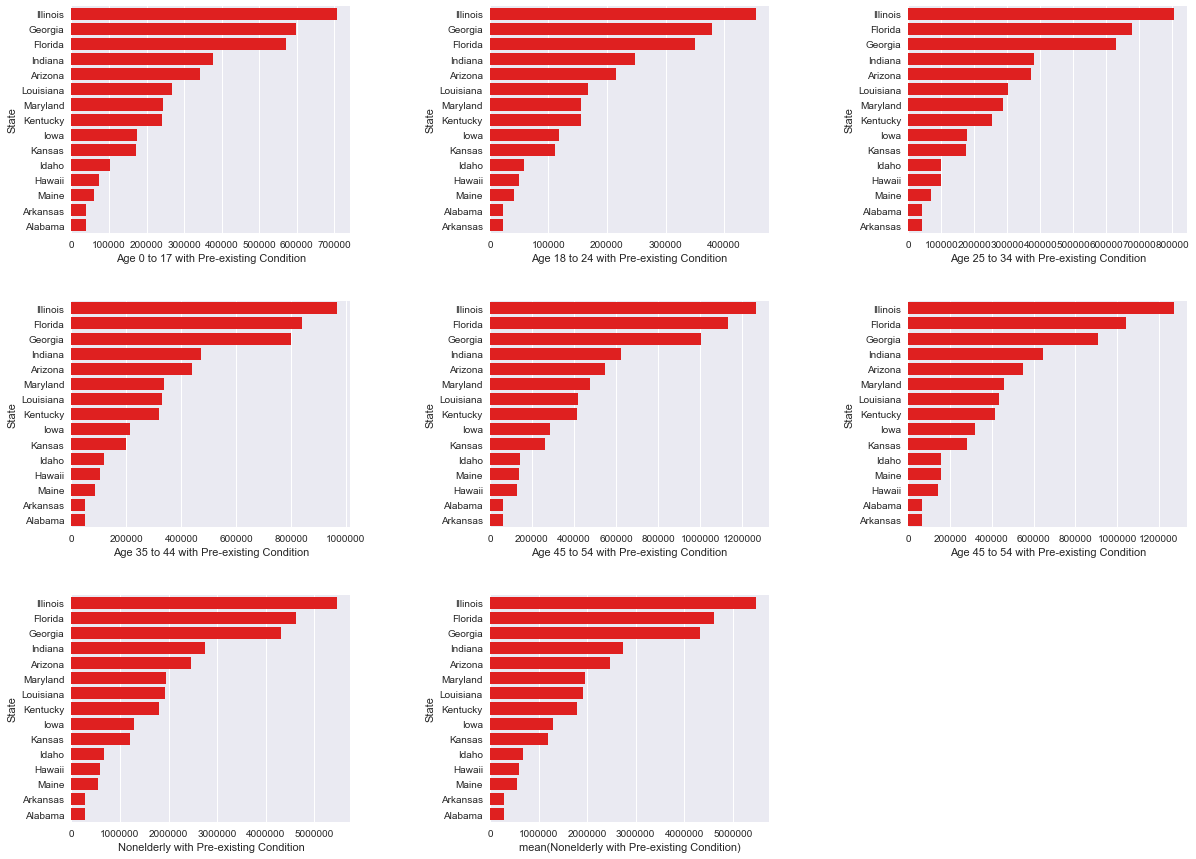

In [11]:
plt.rcParams['figure.figsize']=[20,15]
fig,axs = plt.subplots(3,3)

ax = sns.barplot(x='Age 0 to 17 with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Age 0 to 17 with Pre-existing Condition',ascending=False),color='red',ax=axs[0,0])
ax.set_xlabel('Age 0 to 17 with Pre-existing Condition')

ax = sns.barplot(x='Age 18 to 24 with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Age 18 to 24 with Pre-existing Condition',ascending=False),color='red',ax=axs[0,1])
ax.set_xlabel('Age 18 to 24 with Pre-existing Condition')

ax = sns.barplot(x='Age 25 to 34 with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Age 25 to 34 with Pre-existing Condition',ascending=False),color='red',ax=axs[0,2])
ax.set_xlabel('Age 25 to 34 with Pre-existing Condition')

ax = sns.barplot(x='Age 35 to 44 with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Age 35 to 44 with Pre-existing Condition',ascending=False),color='red',ax=axs[1,0])
ax.set_xlabel('Age 35 to 44 with Pre-existing Condition')

ax = sns.barplot(x='Age 45 to 54 with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Age 45 to 54 with Pre-existing Condition',ascending=False),color='red',ax=axs[1,1])
ax.set_xlabel('Age 45 to 54 with Pre-existing Condition')

ax = sns.barplot(x='Age 55 to 64 with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Age 55 to 64 with Pre-existing Condition',ascending=False),color='red',ax=axs[1,2])
ax.set_xlabel('Age 45 to 54 with Pre-existing Condition')


ax = sns.barplot(x='Nonelderly with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Nonelderly with Pre-existing Condition',ascending=False),color='red',ax=axs[2,0])
ax.set_xlabel('Nonelderly with Pre-existing Condition')

ax = sns.barplot(x='Nonelderly with Pre-existing Condition',y='State',data=populationByState.sort_values(by='Nonelderly with Pre-existing Condition',ascending=False),color='red',ax=axs[2,1])

fig.delaxes(axs[2,2]) #delets a subplot


fig.subplots_adjust(hspace=.3,wspace=.5)


Overall, Illinois is going to be affected the most by the repeal of health care act across all age groups.


## *Grouped by state*

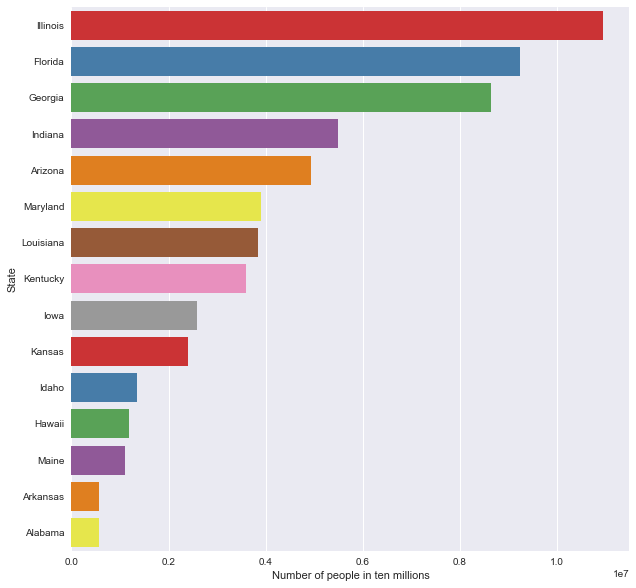

In [12]:
plt.figure(figsize=(10,10))
byState = pd.DataFrame(populationByState.sum(axis=1))
byState['State'] = populationByState['State']
byState.columns = ['Total','State']

ax = sns.barplot('Total','State',data=byState.sort_values(by='Total',ascending=False),palette='Set1')
ax.set_xlabel('Number of people in ten millions')

# Which population in the U.S is affected the most by this policy?

In [13]:
total = pd.DataFrame(populationByState.drop('State',axis=1).sum(axis=0))
total.reset_index(inplace=True)
total.columns = ['population with pre-existing conditions','Total number of people']
total

,population with pre-existing conditions,Total number of people
0,Age 0 to 17 with Pre-existing Condition,4009900.0
1,Age 18 to 24 with Pre-existing Condition,2546700.0
2,Age 25 to 34 with Pre-existing Condition,4405400.0
3,Age 35 to 44 with Pre-existing Condition,5323800.0
4,Age 45 to 54 with Pre-existing Condition,6960900.0
5,Age 55 to 64 with Pre-existing Condition,6900300.0
6,Nonelderly with Pre-existing Condition,30146700.0


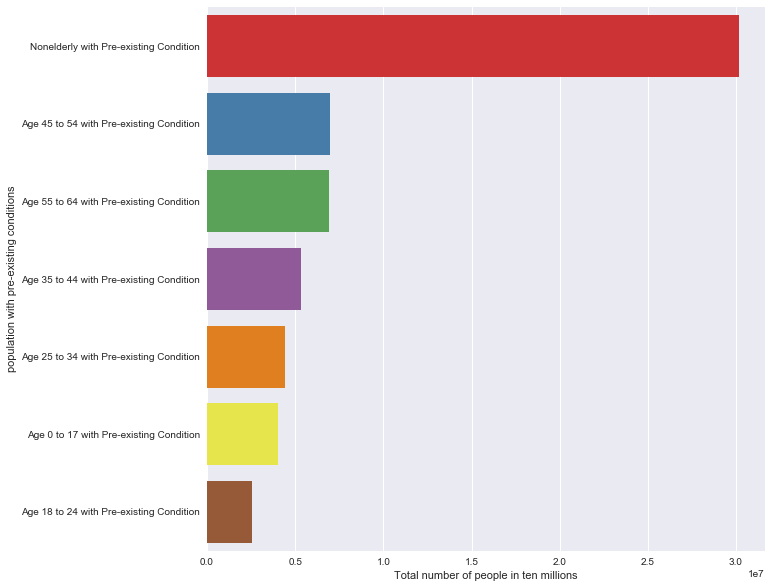

In [14]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x='Total number of people',y='population with pre-existing conditions',data=total.sort_values(by='Total number of people',ascending=False),palette='Set1')
ax.set_xlabel('Total number of people in ten millions')


This shows that the largest population who is likely to be affected by the repeal of the affordable healthcare act is the non-elderly with pre-existing conditions.